#### <span style="color:#dcdc9f;font-weight: 600">Imports iniciais</span>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### <span style="color:#dcdc9f;font-weight: 600">Configurando</span>

In [36]:
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("deep")

df = pd.read_csv('../Resultados/metricas_resultados.csv', delimiter=';')

#### <span style="color:#dcdc9f;font-weight: 600">Dados não tratados</span>

In [37]:
df.head(1000)

,Algoritmo,Tipo,Duração (ms),Tamanho do array,Quant. de threads
0,Mergesort,SERIAL,0.3553,1000,1
1,Mergesort,PARALELO,1.7938,1000,2
2,Countsort,SERIAL,0.0592,1000,1
3,Countsort,PARALELO,12.0908,1000,2
4,Mergesort,SERIAL,0.3789,1000,1
...,...,...,...,...,...
115,Countsort,PARALELO,725.0872,10000000,24
116,Mergesort,SERIAL,1309.3929,10000000,1
117,Mergesort,PARALELO,407.6994,10000000,32
118,Countsort,SERIAL,426.7298,10000000,1


#### <span style="color:#dcdc9f;font-weight: 600">Tabelas de dados</span>

In [38]:
estat = (
    df.groupby("Tipo")["Duração (ms)"]
      .describe()
      .loc[:, ["count", "mean", "std", "min", "max"]]
      .round(3)
)
estat

,count,mean,std,min,max
Tipo,,,,,
PARALELO,60.0,111.573,215.944,-1.000,894.032
SERIAL,60.0,174.398,363.592,0.059,1309.393


In [39]:
estat = (
    df.groupby("Algoritmo")["Duração (ms)"]
      .describe()
      .loc[:, ["count", "mean", "std", "min", "max"]]
      .round(3)
)
estat

,count,mean,std,min,max
Algoritmo,,,,,
Countsort,60.0,110.254,216.110,-1.000,894.032
Mergesort,60.0,175.717,363.257,0.119,1309.393


In [40]:
estat = (
    df.groupby(["Tipo", "Algoritmo"])["Duração (ms)"]
      .describe()
      .loc[:, ["count", "mean", "std", "min", "max"]]
      .round(3)
)
estat

count     mean      std    min       max
Tipo     Algoritmo                                          
PARALELO Countsort   30.0  128.445  250.236 -1.000   894.032
         Mergesort   30.0   94.702  177.947  0.336   664.416
SERIAL   Countsort   30.0   92.063  178.086  0.059   529.754
         Mergesort   30.0  256.732  472.458  0.119  1309.393

In [41]:
df.groupby(["Tipo", "Quant. de threads"])["Duração (ms)"].agg(
    ["mean", "std", "min", "max", "count"]
).round(3)

mean      std    min       max  count
Tipo     Quant. de threads                                          
PARALELO 2                  114.244  222.998  1.794   664.416     10
         4                   99.333  188.031  0.932   457.368     10
         8                   88.167  165.004  0.626   448.022     10
         16                 107.995  217.191  0.336   659.444     10
         24                 115.803  243.216 -1.000   725.087     10
         32                 143.896  291.692  0.520   894.032     10
SERIAL   1                  174.398  363.592  0.059  1309.393     60

In [42]:
df.groupby(["Algoritmo", "Tamanho do array"])["Duração (ms)"].agg(
    ["mean", "std", "min", "max"]
).round(3)

mean      std      min       max
Algoritmo Tamanho do array                                     
Countsort 1000                1.810    3.383    0.059    12.091
          10000               2.606    2.586    0.273     8.864
          100000              4.477    4.262    0.824    12.594
          1000000            27.097   20.207   -1.000    78.298
          10000000          515.279  160.862  364.400   894.032
Mergesort 1000                0.541    0.523    0.119     1.794
          10000               1.995    1.064    0.893     4.748
          100000              8.434    2.758    4.841    13.160
          1000000            64.334   31.317   26.248    96.944
          10000000          803.281  408.254  320.702  1309.393

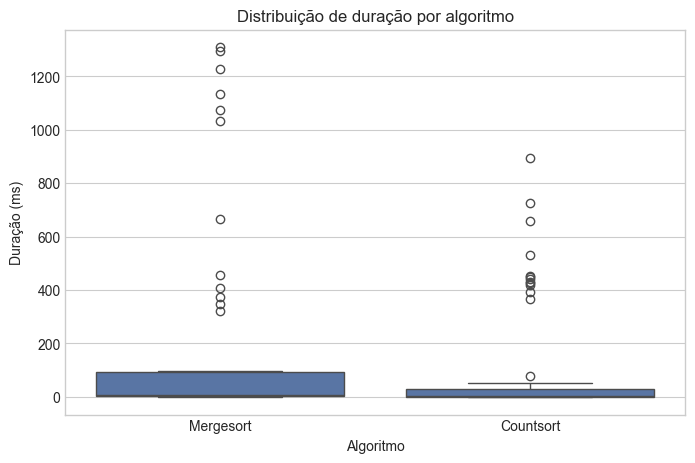

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Algoritmo", y="Duração (ms)")
plt.title("Distribuição de duração por algoritmo")
plt.show()

In [44]:
pd.pivot_table(
    df,
    values="Duração (ms)",
    index="Tamanho do array",
    columns="Tipo",
    aggfunc="mean"
).round(3)

Tipo,PARALELO,SERIAL
Tamanho do array,,
1000,2.198,0.154
10000,3.686,0.915
100000,7.080,5.831
1000000,35.388,56.043
10000000,509.514,809.045


In [45]:
pd.pivot_table(
    df,
    values="Duração (ms)",
    index="Quant. de threads",
    columns="Algoritmo",
    aggfunc="mean"
).round(3)

Algoritmo,Countsort,Mergesort
Quant. de threads,,
1,92.063,256.732
2,82.176,146.312
4,98.064,100.602
8,98.513,77.821
16,143.942,72.048
24,149.684,81.922
32,198.289,89.503


#### <span style="color:#dcdc9f;font-weight: 600">Desempenho por número de threads (somente paralelos)</span>

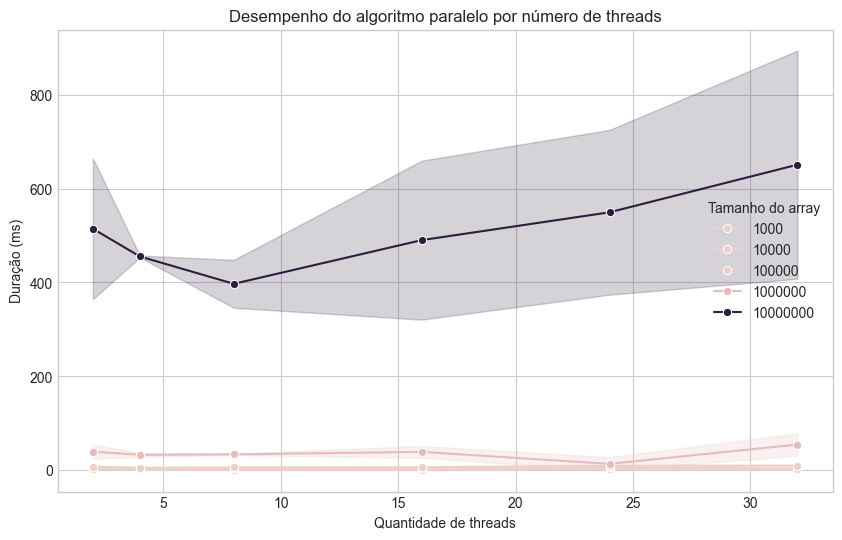

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df[df["Tipo"].str.contains("Paralelo", case=False, na=False)],
    x="Quant. de threads", y="Duração (ms)",
    hue="Tamanho do array", marker="o"
)
plt.title("Desempenho do algoritmo paralelo por número de threads")
plt.xlabel("Quantidade de threads")
plt.ylabel("Duração (ms)")

plt.show()

#### <span style="color:#dcdc9f;font-weight: 600">Comparação Serial x Paralelo</span>

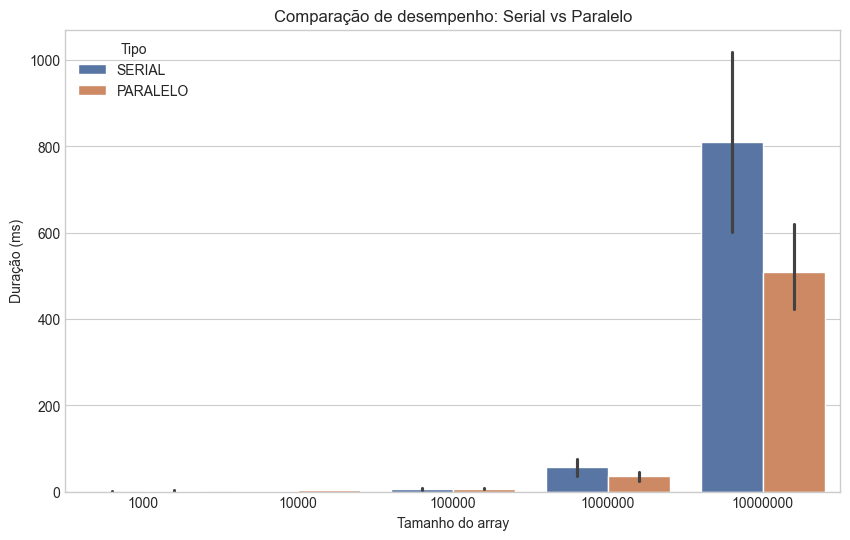

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df, x="Tamanho do array", y="Duração (ms)",
    hue="Tipo"
)
plt.title("Comparação de desempenho: Serial vs Paralelo")
plt.xlabel("Tamanho do array")
plt.ylabel("Duração (ms)")
plt.show()

#### <span style="color:#dcdc9f;font-weight: 600">Cálculo de Speedup (Serial / Paralelo)</span>

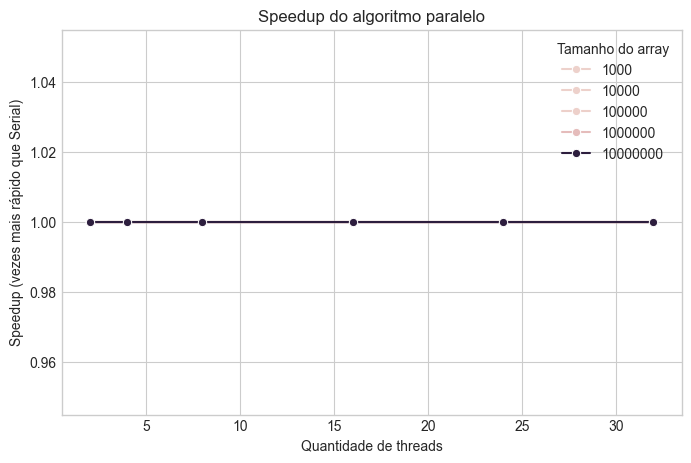

In [48]:
base_serial = (
    df[df["Tipo"].str.contains("Serial", case=False, na=False)]
    .set_index("Tamanho do array")["Duração (ms)"]
)

def calcular_speedup(row):
    if "Paralelo" in row["Tipo"]:
        return base_serial.get(row["Tamanho do array"], None) / row["Duração (ms)"]
    return 1

df["Speedup"] = df.apply(calcular_speedup, axis=1)

plt.figure(figsize=(8,5))
sns.lineplot(
    data=df[df["Tipo"].str.contains("Paralelo", case=False, na=False)],
    x="Quant. de threads", y="Speedup",
    hue="Tamanho do array", marker="o"
)
plt.title("Speedup do algoritmo paralelo")
plt.xlabel("Quantidade de threads")
plt.ylabel("Speedup (vezes mais rápido que Serial)")
plt.show()

#### <span style="color:#dcdc9f;font-weight: 600">Relações entre variáveis (Pairplot)</span>

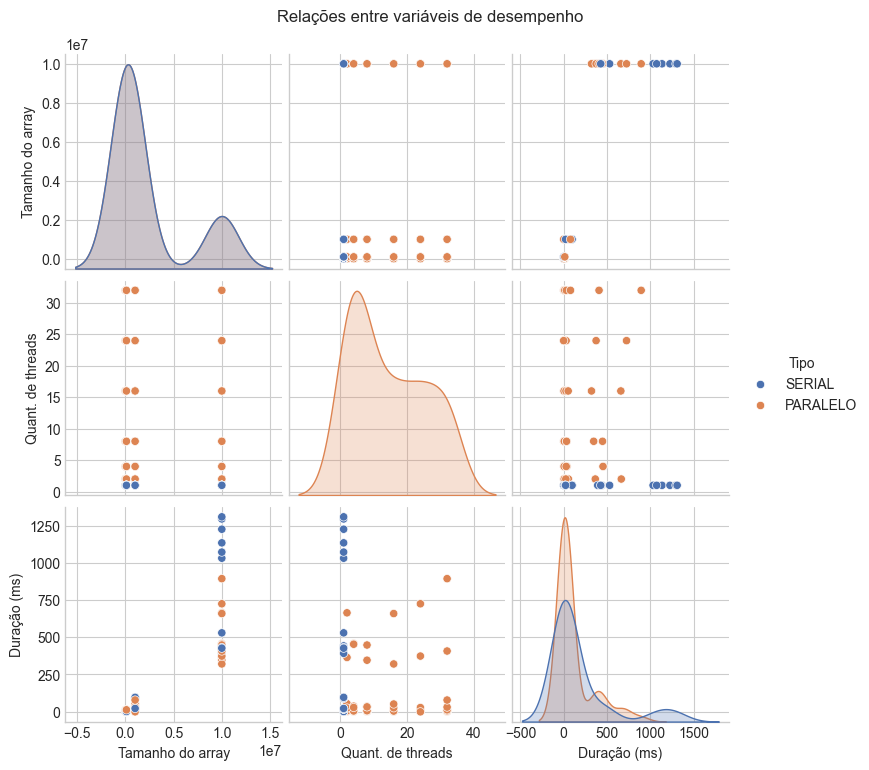

In [49]:
sns.pairplot(
    df,
    vars=["Tamanho do array", "Quant. de threads", "Duração (ms)"],
    hue="Tipo"
)
plt.suptitle("Relações entre variáveis de desempenho", y=1.02)
plt.show()